# HR Analytics

### The systematic process of collecting, analyzing, and interpreting data related to human resources within an organization.

### HRAs can be used for:

1)Detecting patterns that reveal employee turnover?
2)What amount and kind of investment is required to get employees up to a fully productive speed?

solution: WEB INTERFACE!!!

In [55]:
# Parsing and Normalization

In [56]:
import warnings
warnings.filterwarnings('ignore')

import csv

# Specify the path to your CSV file
file_path = 'Employee_Attrition.csv' 

# Initialize an empty list to store the data
data = []

# Open the CSV file and parse it
with open(file_path, mode='r', encoding='utf-8') as csvfile:
    # Create a CSV DictReader
    reader = csv.DictReader(csvfile)
#print(reader)

    #Iterate over the rows in the CSV file
    for row in reader:
        #print(row)
        #Each row is a dictionary where the keys are the column header
        data.append(row)

In [57]:
import sqlite3
def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


def create_table(conn, create_table_sql):
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()
    return rows


create_table_sql = """CREATE TABLE IF NOT EXISTS [Employee] (
      [EmployeeNumber] INTEGER NOT NULL PRIMARY KEY,
      [Age] INTEGER NOT NULL,
      [Over18] TEXT NOT NULL,
      [Gender] TEXT NOT NULL,
      [MaritalStatus] TEXT NOT NULL,
      [Education] INTEGER NOT NULL,
      [EducationField] TEXT NOT NULL,
      [DistanceFromHome] INTEGER NOT NULL,
      [EmployeeCount] INTEGER NOT NULL,
      [TotalWorkingYears] INTEGER NOT NULL,
      [NumCompaniesWorked] INTEGER NOT NULL
    );"""
conn_normalized = create_connection('normalized1.db', delete_db = True)
    
def insert_employee(conn_normalized, values):
    sql = ''' INSERT INTO Employee(EmployeeNumber, Age, Over18, Gender, MaritalStatus, Education, EducationField, DistanceFromHome, EmployeeCount, TotalWorkingYears, NumCompaniesWorked) VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?) '''
    cur = conn_normalized.cursor()
    cur.execute(sql, values)
    return cur.lastrowid
   
with conn_normalized:
    create_table(conn_normalized, create_table_sql)
    for d in data:
        insert_tuple = (d['EmployeeNumber'], d['\ufeffAge'], d['Over18'], d['Gender'], d['MaritalStatus'], d['Education'], d['EducationField'], d['DistanceFromHome'], d['EmployeeCount'], d['TotalWorkingYears'], d['NumCompaniesWorked'])
        insert_employee(conn_normalized, insert_tuple)

In [58]:
create_table_sql = """CREATE TABLE IF NOT EXISTS [Compensation] (
      [EmployeeNumber] INTEGER NOT NULL PRIMARY KEY,
      [DailyRate] INTEGER NOT NULL,
      [HourlyRate] INTEGER NOT NULL,
      [MonthlyRate] INTEGER NOT NULL,
      [MonthlyIncome] INTEGER NOT NULL,
      [StockOptionLevel] INTEGER NOT NULL,
      [StandardHours] INTEGER NOT NULL,
      [OverTime] TEXT NOT NULL,
      FOREIGN KEY(EmployeeNumber) REFERENCES Employee(EmployeeNumber)
    );"""
conn_normalized = create_connection('normalized1.db')
    
def insert_compensation(conn_normalized, values):
    sql = ''' INSERT INTO Compensation(EmployeeNumber, DailyRate, HourlyRate, MonthlyRate, MonthlyIncome, StockOptionLevel, StandardHours, OverTime) VALUES(?, ?, ?, ?, ?, ?, ?, ?) '''
    cur = conn_normalized.cursor()
    cur.execute(sql, values)
    return cur.lastrowid
   
with conn_normalized:
    create_table(conn_normalized, create_table_sql)
    for d in data:
        insert_tuple = (d['EmployeeNumber'], d['DailyRate'], d['HourlyRate'], d['MonthlyRate'], d['MonthlyIncome'], d['StockOptionLevel'], d['StandardHours'], d['OverTime'])
        insert_compensation(conn_normalized, insert_tuple)

In [59]:
create_table_sql = """CREATE TABLE IF NOT EXISTS [PerformanceMetrics] (
      [EmployeeNumber] INTEGER NOT NULL PRIMARY KEY,
      [PerformanceRating] INTEGER NOT NULL,
      [PercentSalaryHike] INTEGER NOT NULL,
      FOREIGN KEY(EmployeeNumber) REFERENCES Employee(EmployeeNumber)
    );"""
conn_normalized = create_connection('normalized1.db')
    
def insert_performace(conn_normalized, values):
    sql = ''' INSERT INTO PerformanceMetrics(EmployeeNumber, PerformanceRating, PercentSalaryHike) VALUES(?, ?, ?) '''
    cur = conn_normalized.cursor()
    cur.execute(sql, values)
    return cur.lastrowid
   
with conn_normalized:
    create_table(conn_normalized, create_table_sql)
    for d in data:
        insert_tuple = (d['EmployeeNumber'], d['PerformanceRating'], d['PercentSalaryHike'])
        insert_performace(conn_normalized, insert_tuple)

In [60]:
create_table_sql = """CREATE TABLE IF NOT EXISTS [WorkEnvironment] (
      [EmployeeNumber] INTEGER NOT NULL PRIMARY KEY,
      [EnvironmentSatisfaction] INTEGER NOT NULL,
      [JobSatisfaction] INTEGER NOT NULL,
      [WorkLifeBalance] INTEGER NOT NULL,
      [BusinessTravel] INTEGER NOT NULL,
      [RelationshipSatisfaction] INTEGER NOT NULL,
      [JobInvolvement] INTEGER NOT NULL,
      FOREIGN KEY(EmployeeNumber) REFERENCES Employee(EmployeeNumber)
    );"""
conn_normalized = create_connection('normalized1.db')
    
def insert_workenv(conn_normalized, values):
    sql = ''' INSERT INTO WorkEnvironment(EmployeeNumber, EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance, BusinessTravel, RelationshipSatisfaction, JobInvolvement) VALUES(?, ?, ?, ?, ?, ?, ?) '''
    cur = conn_normalized.cursor()
    cur.execute(sql, values)
    return cur.lastrowid
   
with conn_normalized:
    create_table(conn_normalized, create_table_sql)
    for d in data:
        insert_tuple = (d['EmployeeNumber'], d['EnvironmentSatisfaction'], d['JobSatisfaction'], d['WorkLifeBalance'], d['BusinessTravel'], d['RelationshipSatisfaction'], d['JobInvolvement'])
        insert_workenv(conn_normalized, insert_tuple)

In [61]:
#################EmployeeAtCurrentCompany##############################

create_table_sql = """CREATE TABLE IF NOT EXISTS [EmployeeAtCurrentCompany] (
      [EmployeeNumber] INTEGER NOT NULL PRIMARY KEY,
      [TrainingTimesLastYear] INTEGER NOT NULL,
      [YearsAtCompany] INTEGER NOT NULL,
      [YearsInCurrentRole] INTEGER NOT NULL,
      [YearsSinceLastPromotion] INTEGER NOT NULL,
      [YearsWithCurrManager] INTEGER NOT NULL,
      [Department] TEXT NOT NULL,
      [JobRole] INTEGER NOT NULL,
      [JobLevel] INTEGER NOT NULL,
      FOREIGN KEY(EmployeeNumber) REFERENCES Employee(EmployeeNumber)
    );"""
conn_normalized = create_connection('normalized1.db')
    
def insert_employeeatcurrentcompany(conn_normalized, values):
    sql = ''' INSERT INTO EmployeeAtCurrentCompany(EmployeeNumber, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Department, JobRole, JobLevel) VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?) '''
    cur = conn_normalized.cursor()
    cur.execute(sql, values)
    return cur.lastrowid
   
with conn_normalized:
    create_table(conn_normalized, create_table_sql)
    for d in data:
        insert_tuple = (d['EmployeeNumber'], d['TrainingTimesLastYear'], d['YearsAtCompany'], d['YearsInCurrentRole'], d['YearsSinceLastPromotion'], d['YearsWithCurrManager'], d['Department'], d['JobRole'], d['JobLevel'])
        insert_employeeatcurrentcompany(conn_normalized, insert_tuple)


In [62]:
############################ATTRITION#########################################


create_table_sql = """CREATE TABLE IF NOT EXISTS [Attrition] (
      [EmployeeNumber] INTEGER NOT NULL PRIMARY KEY,
      [Attrition] TEXT NOT NULL,
      FOREIGN KEY(EmployeeNumber) REFERENCES Employee(EmployeeNumber)
    );"""
conn_normalized = create_connection('normalized1.db')
    
def insert_attrition(conn_normalized, values):
    sql = ''' INSERT INTO Attrition(EmployeeNumber, Attrition) VALUES(?, ?) '''
    cur = conn_normalized.cursor()
    cur.execute(sql, values)
    return cur.lastrowid
   
with conn_normalized:
    create_table(conn_normalized, create_table_sql)
    for d in data:
        insert_tuple = (d['EmployeeNumber'], d['Attrition'])
        insert_attrition(conn_normalized, insert_tuple)

In [63]:
import pandas as pd

conn_normalized = create_connection('normalized1.db')

sql_statement = """SELECT Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, Employee.EmployeeNumber, EnvironmentSatisfaction, Gender,  HourlyRate, JobInvolvement, JobLevel,JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome,  MonthlyRate, NumCompaniesWorked, Over18, Overtime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, 
WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager 

FROM Employee JOIN Compensation ON Employee.EmployeeNumber = Compensation.EmployeeNumber
JOIN PerformanceMetrics ON PerformanceMetrics.EmployeeNumber = Employee.EmployeeNumber
JOIN WorkEnvironment ON WorkEnvironment.EmployeeNumber = Employee.EmployeeNumber
JOIN EmployeeAtCurrentCompany ON EmployeeAtCurrentCompany.EmployeeNumber = Employee.EmployeeNumber
JOIN Attrition ON Attrition.EmployeeNumber = Employee.EmployeeNumber"""

dats = execute_sql_statement(sql_statement, conn_normalized)

df = pd.DataFrame(dats, columns=['Age','Attrition', 'BusinessTravel', 'DailyRate','Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 
'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',   'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',  
])

print(df)


conn_normalized.commit()
conn_normalized.close()

df.head()

      Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0       

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [64]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


# df = pd.read_csv(r"C:/Users/hp/Downloads/data_e.csv")


# New Dataframe for preprocessing
pd.set_option('display.max_columns', None)
df.shape

(1470, 35)

In [66]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [67]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [68]:
df.Attrition.value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

## Preprocessing 

In [70]:
# 26 numerical, 9 categorical columns
# No NaNs in my dataset

In [71]:
# New column

df['Generation'] = pd.cut(df['Age'],
                          bins=[0, 27 ,37, 54, float('inf')],
                          labels=['Generation Z', 'Millennials', 'Generation X', 'Boomers'])

model = df.copy()
model.shape

(1470, 36)

In [72]:
model.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Generation
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Generation X
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,Generation X
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Millennials
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,Millennials
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,Generation Z


In [73]:
model.dtypes

Age                            int64
Attrition                     object
BusinessTravel                object
DailyRate                      int64
Department                    object
DistanceFromHome               int64
Education                      int64
EducationField                object
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                        object
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                       object
JobSatisfaction                int64
MaritalStatus                 object
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                        object
OverTime                      object
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StandardHours                  int64
S

In [74]:
model.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Generation
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Millennials
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,638
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,NaN
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,NaN
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,NaN
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,NaN
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,NaN


In [75]:
# Dropping variables that didnt made sense 
model_train = model.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'])
model_train['Generation'] = model_train['Generation'].astype('object')

In [76]:
## Outlier analysis

import numpy as np
df=model_train.copy()
cols = df.columns
all_outliers = []

for col in cols:
    if np.issubdtype(df[col].dtype, np.number):
        mean_val = df[col].mean()
        sd_val = df[col].std()
        z_scores = (df[col] - mean_val) / sd_val
        outliers = np.where((z_scores < -3) | (z_scores > 3))[0]
        all_outliers.extend(outliers)
        
# Get unique indices of all outliers
all_outliers = np.unique(all_outliers)

# Remove rows with outliers
df1 = df.drop(index=all_outliers).reset_index(drop=True)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1387 non-null   int64 
 1   Attrition                 1387 non-null   object
 2   BusinessTravel            1387 non-null   object
 3   DailyRate                 1387 non-null   int64 
 4   Department                1387 non-null   object
 5   DistanceFromHome          1387 non-null   int64 
 6   Education                 1387 non-null   int64 
 7   EducationField            1387 non-null   object
 8   EnvironmentSatisfaction   1387 non-null   int64 
 9   Gender                    1387 non-null   object
 10  HourlyRate                1387 non-null   int64 
 11  JobInvolvement            1387 non-null   int64 
 12  JobLevel                  1387 non-null   int64 
 13  JobRole                   1387 non-null   object
 14  JobSatisfaction         

In [77]:
## Post outlier analysis, 83 observations were eliminated

In [78]:
# Rename columns and convert categorical variables to numerical
model_train=df1.copy()
model_train['y'] = (model_train['Attrition'] == 'Yes').astype(int)
model_train['OverTime'] = (model_train['OverTime'] == 'Yes').astype(int)
model_train['Gender'] = (model_train['Gender'] == 'Male').astype(int)

model_train1 = model_train.drop(['Attrition','y'], axis=1)

In [79]:
# One-hot encoding 
model_train1 = pd.get_dummies(model_train1)

In [80]:
# Remove features with zero variability
nzv = model_train1.apply(lambda x: x.nunique() <= 1)
d = model_train1.loc[:, ~nzv]
nzv



Age                                  False
DailyRate                            False
DistanceFromHome                     False
Education                            False
EnvironmentSatisfaction              False
Gender                               False
HourlyRate                           False
JobInvolvement                       False
JobLevel                             False
JobSatisfaction                      False
MonthlyIncome                        False
MonthlyRate                          False
NumCompaniesWorked                   False
OverTime                             False
PercentSalaryHike                    False
PerformanceRating                    False
RelationshipSatisfaction             False
StockOptionLevel                     False
TotalWorkingYears                    False
TrainingTimesLastYear                False
WorkLifeBalance                      False
YearsAtCompany                       False
YearsInCurrentRole                   False
YearsSinceL

In [81]:
d.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Generation_Boomers,Generation_Generation X,Generation_Generation Z,Generation_Millennials
0,41,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False
1,49,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False
2,37,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
3,33,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True
4,27,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False


In [82]:
# Scale data
scaler = StandardScaler()
d.iloc[:, :] = scaler.fit_transform(d.iloc[:, :])
d1 = pd.concat([model_train['y'], d ], axis=1)
d1.head()

,y,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Generation_Boomers,Generation_Generation X,Generation_Generation Z,Generation_Millennials
0,1,0.536681,0.734325,-1.011249,-0.876177,-0.665328,-1.229911,1.388670,0.376231,0.043309,1.143776,-0.007750,0.734688,2.125951,1.584737,-1.161414,-0.424765,-1.575817,-0.929427,-0.343728,-2.171420,-2.501172,-0.022350,0.040903,-0.710699,0.368270,-0.339045,-0.483721,0.643322,-0.208906,-1.379012,1.517360,-0.135482,1.197219,-0.346923,-0.678233,-0.245759,-0.31748,-0.310552,-0.197361,-0.47348,-0.228806,-0.333734,-0.219943,-0.515278,1.852380,-0.25229,-0.529813,-0.920256,1.450141,-0.197361,1.350869,-0.422398,-0.917587
1,0,1.442111,-1.307769,-0.145521,-1.853858,0.251978,0.813067,-0.239091,-1.034126,0.043309,-0.673426,-0.210963,1.505353,-0.672430,-0.631019,2.146916,2.354241,1.199034,0.238250,-0.045106,0.151871,0.336558,0.832812,0.965895,-0.310480,0.982200,-0.339045,2.067308,-1.554431,-0.208906,0.725157,-0.659039,-0.135482,1.197219,-0.346923,-0.678233,-0.245759,-0.31748,-0.310552,-0.197361,-0.47348,-0.228806,-0.333734,-0.219943,1.940702,-0.539846,-0.25229,-0.529813,1.086654,-0.689588,-0.197361,1.350869,-0.422398,-0.917587
2,1,0.083966,1.406752,-0.887573,-0.876177,1.169285,0.813067,1.290017,-1.034126,-0.941432,0.235175,-0.926802,-1.690747,1.326414,1.584737,-0.058637,-0.424765,-0.650866,-0.929427,-0.493039,0.151871,0.336558,-1.305094,-1.192419,-0.710699,-1.166556,-0.339045,-0.483721,0.643322,-0.208906,0.725157,-0.659039,-0.135482,-0.835269,-0.346923,-0.678233,4.069025,-0.31748,-0.310552,-0.197361,2.11202,-0.228806,-0.333734,-0.219943,-0.515278,-0.539846,-0.25229,-0.529813,-0.920256,1.450141,-0.197361,-0.740264,-0.422398,1.089815
3,0,-0.368749,1.453896,-0.763898,1.079185,1.169285,-1.229911,-0.485721,0.376231,-0.941432,0.235175,-0.733949,1.257173,-0.672430,1.584737,-1.161414,-0.424765,0.274084,-0.929427,-0.343728,0.151871,0.336558,0.405231,0.965895,0.489958,-1.166556,-0.339045,2.067308,-1.554431,-0.208906,0.725157,-0.659039,-0.135482,1.197219,-0.346923,-0.678233,-0.245759,-0.31748,-0.310552,-0.197361,-0.47348,-0.228806,-0.333734,-0.219943,1.940702,-0.539846,-0.25229,-0.529813,1.086654,-0.689588,-0.197361,-0.740264,-0.422398,1.089815
4,0,-1.047821,-0.533609,-0.887573,-1.853858,-1.582635,0.813067,-1.274939,0.376231,-0.941432,-0.673426,-0.602320,0.330473,2.525720,-0.631019,-0.885720,-0.424765,1.199034,0.238250,-0.642351,0.151871,0.336558,-0.877513,-0.575758,0.089739,-0.552626,-0.339045,-0.483721,0.643322,-0.208906,0.725157,-0.659039,-0.135482,-0.835269,-0.346923,1.474420,-0.245759,-0.31748,-0.310552,-0.197361,2.11202,-0.228806,-0.333734,-0.219943,-0.515278,-0.539846,-0.25229,-0.529813,1.086654,-0.689588,-0.197361,-0.740264,2.367438,-0.917587


In [83]:
### Model

In [84]:
X_train, X_test, y_train, y_test = train_test_split(d1.iloc[:, 1:], d1['y'], test_size=0.1, random_state=1234)

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold

# Define the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(random_state=1234)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

In [86]:
# Create GridSearchCV with 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
grid_search = GridSearchCV(gbm, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Display the best parameters and corresponding AUC score
print("Best Parameters: ", grid_search.best_params_)
print("Best AUC Score: ", grid_search.best_score_)

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best AUC Score:  0.7983142723771736


In [87]:
# Predictions on train and test datasets using the best model
gbmfit = grid_search.best_estimator_
best_gbm_train_probs = gbmfit.predict_proba(X_train)[:, 1]
best_gbm_test_probs = gbmfit.predict_proba(X_test)[:, 1]

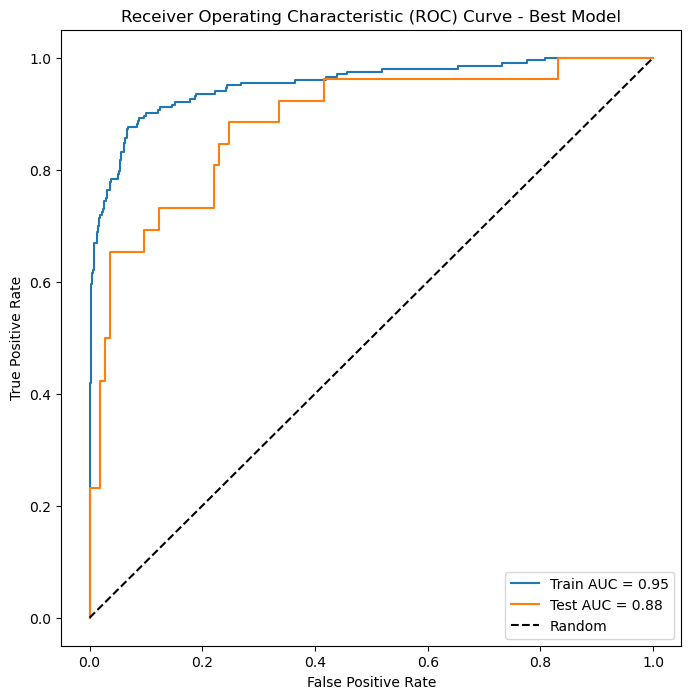

In [88]:
# Evaluate ROC on train dataset using the best model
fpr_train_best, tpr_train_best, _ = roc_curve(y_train, best_gbm_train_probs)
roc_auc_train_best = roc_auc_score(y_train, best_gbm_train_probs)

# Evaluate ROC on test dataset using the best model
fpr_test_best, tpr_test_best, _ = roc_curve(y_test, best_gbm_test_probs)
roc_auc_test_best = roc_auc_score(y_test, best_gbm_test_probs)

# Plot ROC curves
plt.figure(figsize=(8, 8))
plt.plot(fpr_train_best, tpr_train_best, label=f'Train AUC = {roc_auc_train_best:.2f}')
plt.plot(fpr_test_best, tpr_test_best, label=f'Test AUC = {roc_auc_test_best:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Best Model')
plt.legend()
plt.show()

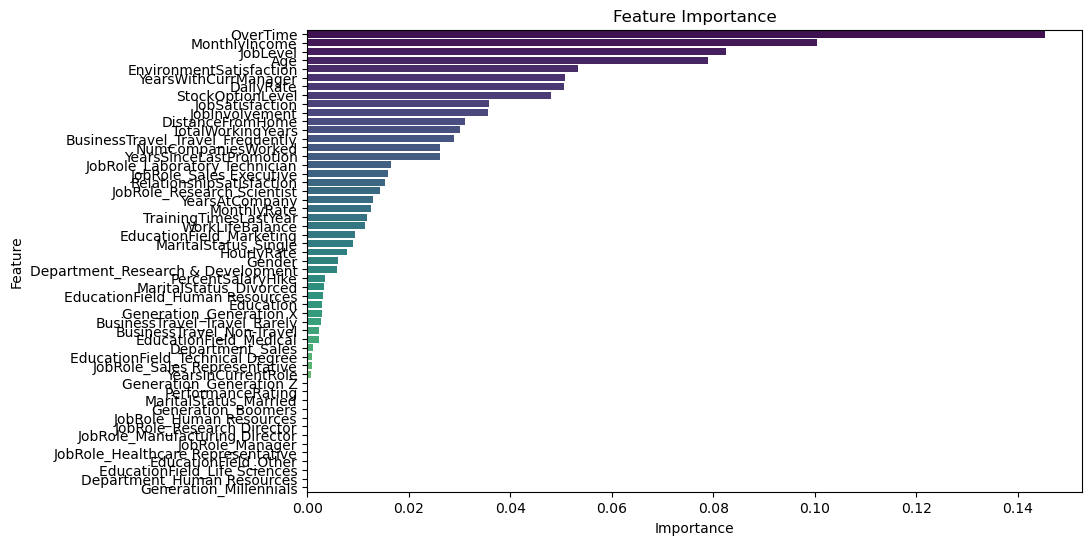

In [89]:
##Feature Importance graph

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier


feature_importances = gbmfit.feature_importances_

feature_names = X_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


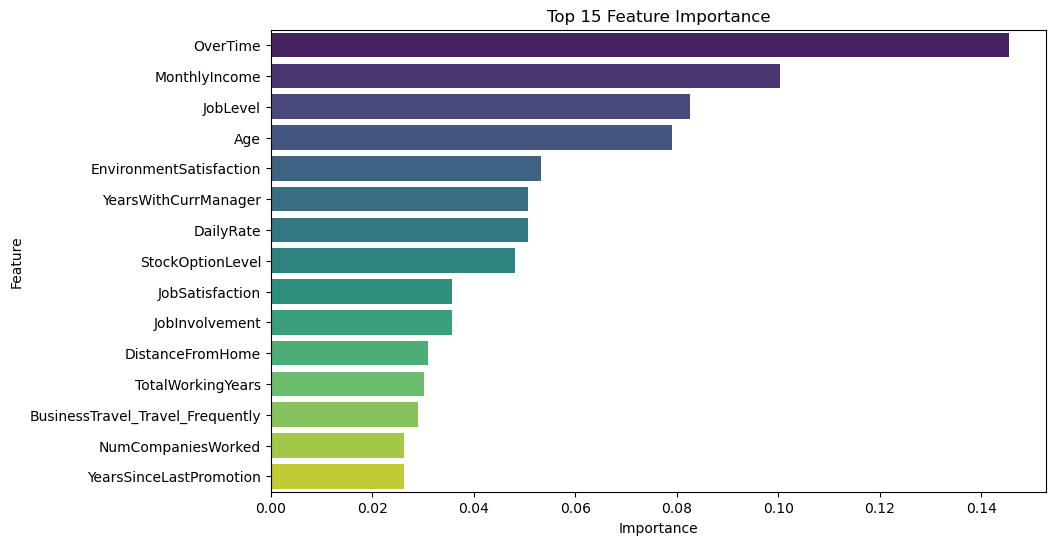

In [90]:
top_features = feature_importance_df.head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 15 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [91]:
### Web interface

In [92]:
pip install dash

Note: you may need to restart the kernel to use updated packages.


In [93]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd
import plotly.express as px
from dash import dcc, html, Input, Output
from plotly.subplots import make_subplots
import plotly.graph_objs as go



app = dash.Dash(__name__)

# Define the layout for the first tab
app.layout = html.Div([
    # Dashboard header
    html.Div(
        className="app-header",
        children=[
            html.H1("HR Dashboard")
        ]
    ),

    # Sidebar content
    dcc.Tabs(id='tabs', value='EDA', children=[
        dcc.Tab(
            label='Exploratory Data Analysis',
            value='EDA',
            children=[
                html.Div([
                    html.I(className="fa fa-calendar"),
                    html.Span('Exploratory Data Analysis')
                ]),
                # Content for the first tab
                html.Div([
                    dcc.Graph(id='plot2', style={'height': '300px'}),], className='four columns'),
                html.Div([
                    dcc.Graph(id='plot1', style={'height': '300px'}),], className='four columns'),
                html.Div([
                    dcc.Graph(id='plot4', style={'height': '300px'}),], className='four columns'),
                html.Div([
                    dcc.Graph(id='incomeattrition', style={'height': '300px'}),], className='six columns'),
                html.Div([
                    dcc.Graph(id='diffgenerations', style={'height': '300px'}),], className='six columns'),
                html.Div([
                    dcc.Graph(id='incomevshike', style={'height': '300px'}),], className='six columns'),
                html.Div([
                    dcc.Graph(id='PRvsIncome', style={'height': '300px'}),], className='six columns'),
            ]),

        dcc.Tab(
        label="Predictive App",
        value="predict",
        children=[
            html.Div(
                className="row",
                children=[
                    html.Div(
                        className="six columns",
                        children=[
                            html.Div([
                                html.Label("Age"),
                                dcc.Slider(id="age", min=19, max=60, value=25, step=1, marks={i: str(i) for i in range(19, 61)})
                            ]),
                            html.Div([
                                html.Label("Years at Company"),
                                dcc.Input(id="yearsatcompany", type="number", value=5, min=0, max=40, step=1, placeholder="Years at Company")
                            ]),
                            html.Div([
                                html.Label("Total Work Ex"),
                                dcc.Input(id="totalworkingyears", type="number", value=7, min=0, max=40, step=1, placeholder="Total Work Ex")
                            ]),
                            html.Div([
                                html.Label("Overtime"),
                                dcc.Dropdown(id="Overtime", options=[
                                    {"label": "Yes", "value": 1},
                                    {"label": "No", "value": 0}
                                ], value=1, placeholder="Pick Overtime")
                            ]),
                            html.Div([
                                html.Label("Stock Option Level"),
                                dcc.Dropdown(id="StockOptionLevel", options=[
                                    {"label": str(i), "value": i} for i in range(4)
                                ], value=1, placeholder="What is the Stock Option Level?")
                            ]),
                            html.Div([
                                html.Label("Business Travel"),
                                dcc.RadioItems(
                                    id="btravel",
                                    options=[
                                        {"label": "Non Travel", "value": "A"},
                                        {"label": "Travel Frequently", "value": "B"},
                                        {"label": "Travel Rarely", "value": "C"}
                                    ],
                                    value="A",
                                    labelStyle={'display': 'block'}
                                )
                            ]),
                            html.Div([
                                html.Label("Environment Satisfaction Level"),
                                dcc.RadioItems(
                                    id="EnvironmentSatisfactionL",
                                    options=[
                                        {"label": "Low", "value": 0},
                                        {"label": "Medium", "value": 3},
                                        {"label": "High", "value": 6},
                                        {"label": "Very High", "value": 9}
                                    ],
                                    value=3,
                                    labelStyle={'display': 'block'}
                                )
                            ]),
                            html.Div([
                                html.Label("Salary"),
                                dcc.Slider(id="salary", min=1000, max=50000, value=10000, step=1000, marks={i: str(i) for i in range(1000, 51000, 10000)})
                            ]),
                            html.Div([
                                html.Label("Years With Current Manager"),
                                dcc.Slider(id="YearsWithCurrManager", min=0, max=20, value=5, step=1, marks={i: str(i) for i in range(0, 21)})
                            ])
                        ]
                    ),
                    html.Div(
                        className="six columns",
                        children=[
                            html.Div(id="approvalBox", className="info-box", style={"width": "100%"}),
                            html.Div(id="SuggestionBox", className="info-box", style={"width": "100%"})
                        ]
                    )
                ]
            )
        ]
    )

    ]),
])




##TAB1

@app.callback(
    Output('plot2', 'figure'),
    [Input('tabs', 'value')]
)
def update_plot2(tab):
    # Logic for updating plot2
    plot_data = df.groupby('Department').size().reset_index(name='Number of Employees')
    fig = px.bar(plot_data, x='Department', y='Number of Employees', title='Number of Employees by Department')
    return fig

@app.callback(
    Output('plot1', 'figure'),
    [Input('tabs', 'value')]
)
def update_plot1(tab):
    # Logic for updating plot1
    plot_data = df['JobRole'].value_counts().reset_index(name='Count')
    fig = px.pie(plot_data, names='JobRole', values='Count', title='Major Job roles inside the Organization')
    return fig

@app.callback(
    Output('plot4', 'figure'),
    [Input('tabs', 'value')]
)
def update_plot4(tab):
    # Logic for updating plot4
    plot_data = df['Gender'].value_counts().reset_index(name='Count')
    fig = px.pie(plot_data, names='Gender', values='Count', title='Gender Distribution')
    return fig



@app.callback(
    Output('incomeattrition', 'figure'),
    [Input('tabs', 'value')]
)
def update_incomeattrition(tab):
    # Logic for updating incomeattrition plot
    fig = px.histogram(df, x='MonthlyIncome', color='Attrition', barmode='overlay',
                       title='Is monthly income a reason for Employees to leave?')
    return fig



# Callback for 'Understanding different generations'
@app.callback(
    Output('diffgenerations', 'figure'),
    [Input('tabs', 'value')]
)
def update_diffgenerations(tab):
    # Logic for updating diffgenerations plot
    fig = px.pie(df, names='Generation', title='Understanding different generations')
    return fig



# Callback for 'Monthly Income vs percent Hike'
@app.callback(
    Output('incomevshike', 'figure'),
    [Input('tabs', 'value')]
)
def update_incomevshike(tab):
    # Logic for updating incomevshike plot
    fig = px.scatter(df, x='MonthlyIncome', y='PercentSalaryHike', color='Attrition',
                     title='Monthly Income vs percent Hike')
    return fig

# Callback for 'Performance Rating vs Monthly Income'
@app.callback(
    Output('PRvsIncome', 'figure'),
    [Input('tabs', 'value')]
)
def update_PRvsIncome(tab):
    # Logic for updating PRvsIncome plot
    fig = px.box(df, x='PerformanceRating', y='MonthlyIncome', color='Attrition',
                 title='Performance Rating vs Monthly Income')
    return fig


## PREDICT


# Callbacks to update info boxes
@app.callback(
    Output("approvalBox", "children"),
    [Input("age", "value"),
     Input("yearsatcompany", "value"),
     Input("totalworkingyears", "value"),
     Input("Overtime", "value"),
     Input("StockOptionLevel", "value"),
     Input("btravel", "value"),
     Input("EnvironmentSatisfactionL", "value"),
     Input("salary", "value"),
     Input("YearsWithCurrManager", "value")]
)
def update_approval_box(age, years_at_company, total_working_years, overtime, stock_option_level,
                        business_travel, environment_satisfaction, salary, years_with_curr_manager):
    # Add logic to calculate and return approval information
    approval_info = f"""Age: {age}, Years at Company: {years_at_company}, Total Work Ex: {total_working_years}, 
                            Overtime: {overtime}, Stock Option Level: {stock_option_level},
                            Business Travel: {business_travel}, Environment Satisfaction: {environment_satisfaction}, 
                            Salary: {salary}, Years With Current Manager: {years_with_curr_manager}"""

    return html.Div([
        html.H4("Approval Information"),
        html.P(approval_info)
    ])

@app.callback(
    Output("SuggestionBox", "children"),
    [Input("age", "value"),
     Input("yearsatcompany", "value"),
     Input("totalworkingyears", "value"),
     Input("Overtime", "value"),
     Input("StockOptionLevel", "value"),
     Input("btravel", "value"),
     Input("EnvironmentSatisfactionL", "value"),
     Input("salary", "value"),
     Input("YearsWithCurrManager", "value")]
)
def update_suggestion_box(age, years_at_company, total_working_years, overtime, stock_option_level,
                           business_travel, environment_satisfaction, salary, years_with_curr_manager):
    # Add logic to calculate and return suggestions
    suggestion_info = "Based on the input, it is suggested to..."
    # Create DataFrame for prediction
    df1 = pd.DataFrame({
        'Age': [age / 100],
        'DailyRate': 0,
        'DistanceFromHome': 0,
        'Education': 0,
                'EnvironmentSatisfaction': [environment_satisfaction / 9],
         'Gender': 0,
                'HourlyRate': 0,
                'JobInvolvement': 0,
                'JobLevel': 0,
                'JobSatisfaction': 0,
                'MonthlyIncome': [salary / 20000],
        'MonthlyRate': 0,
                'NumCompaniesWorked': 0,
 
        'OverTime': [int(overtime)],
                      'PercentSalaryHike': 0,
        'PerformanceRating': 0,
                'RelationshipSatisfaction': 0,
        
        'StockOptionLevel': [stock_option_level / 4],
               'TotalWorkingYears': 0,
                'TrainingTimesLastYear': 0,
        'WorkLifeBalance': 0,
                'YearsAtCompany': 0,
        'YearsInCurrentRole': 0,
        'YearsSinceLastPromotion': 0,
    
        
        'YearsWithCurrManager': [years_with_curr_manager / 20],
        'BusinessTravel_Non-Travel': 0,
         'BusinessTravel_Travel_Frequently': 0,
         'BusinessTravel_Travel_Rarely': 0,
        'Department_Human Resources': 0,
        'Department_Research & Development': 0,
        'Department_Sales': 0,


        'EducationField_Human Resources': 0,
        'EducationField_Life Sciences': 0,
        'EducationField_Marketing': 0,
        'EducationField_Medical': 0,
        'EducationField_Other': 0,
        'EducationField_Technical Degree': 0,
                'JobRole_Healthcare Representative': 0,
        'JobRole_Human Resources': 0,
        'JobRole_Laboratory Technician': 0,
        'JobRole_Manager': 0,
        'JobRole_Manufacturing Director': 0,
        'JobRole_Research Director': 0,
        'JobRole_Research Scientist': 0,
        'JobRole_Sales Executive': 0,
        'JobRole_Sales Representative': 0,
                'MaritalStatus_Divorced': 0,
        'MaritalStatus_Married': 0,
        'MaritalStatus_Single': 0,
                'Generation_Boomers': 0,
                'Generation_Generation X': 0,
        'Generation_Generation Z':0,
                'Generation_Millennials': 0

        
    })
    
    
 
    
    

    df2 = pd.DataFrame({
        'Age': [age / 100],
         'DailyRate': 0,
        'DistanceFromHome': 0,
        'Education': 0,
                'EnvironmentSatisfaction': [environment_satisfaction / 9],
                        'Gender': 0,
                'HourlyRate': 0,
                'JobInvolvement': 0,
                'JobLevel': 0,
                'JobSatisfaction': 0,
                'MonthlyIncome': [(salary + 1500) / 20000],
               'MonthlyRate': 0,
                'NumCompaniesWorked': 0,
        'OverTime': [0],
          'PercentSalaryHike': 0,
        'PerformanceRating': 0,
                'RelationshipSatisfaction': 0,
        'StockOptionLevel': [(stock_option_level + 1) / 4],
         'TotalWorkingYears': 0,
                'TrainingTimesLastYear': 0,
        'WorkLifeBalance': 0,
                'YearsAtCompany': 0,
        'YearsInCurrentRole': 0,
        'YearsSinceLastPromotion': 0,
        
        

        'YearsWithCurrManager': [years_with_curr_manager / 20],
                         'BusinessTravel_Non-Travel': 0,
         'BusinessTravel_Travel_Frequently': 0,
         'BusinessTravel_Travel_Rarely': 0,
        'Department_Human Resources': 0,
        'Department_Research & Development': 0,
        'Department_Sales': 0,


        'EducationField_Human Resources': 0,
        'EducationField_Life Sciences': 0,
        'EducationField_Marketing': 0,
        'EducationField_Medical': 0,
        'EducationField_Other': 0,
        'EducationField_Technical Degree': 0,
                'JobRole_Healthcare Representative': 0,
        'JobRole_Human Resources': 0,
        'JobRole_Laboratory Technician': 0,
        'JobRole_Manager': 0,
        'JobRole_Manufacturing Director': 0,
        'JobRole_Research Director': 0,
        'JobRole_Research Scientist': 0,
        'JobRole_Sales Executive': 0,
        'JobRole_Sales Representative': 0,
                'MaritalStatus_Divorced': 0,
        'MaritalStatus_Married': 0,
        'MaritalStatus_Single': 0,
                'Generation_Boomers': 0,
                'Generation_Generation X': 0,
        'Generation_Generation Z':0,
                'Generation_Millennials': 0
        

        
    })

    # Business travel logic
    if business_travel == 'A':
        df1['BusinessTravel_Non-Travel'] = 1
        df2['BusinessTravel_Non-Travel'] = 1
    elif business_travel == 'B':
        df1['BusinessTravel_Travel_Frequently'] = 1
        df2['BusinessTravel_Non-Travel'] = 1
    elif business_travel == 'C':
        df1['BusinessTravel_Travel_Rarely'] = 1
        df2['BusinessTravel_Non-Travel'] = 1

    # Additional columns
    df1['YearsAtCompany'] = [years_at_company / 40]
    df2['YearsAtCompany'] = [years_at_company / 40]
    
    df1['TotalWorkingYears'] = [total_working_years / 40]
    df2['TotalWorkingYears'] = [total_working_years / 40]

    # Predictions
    preds1 = gbmfit.predict_proba(df1)[:, 1]
    preds2 = gbmfit.predict_proba(df2)[:, 1]

    result1 = round(float(preds1), 2)
    result2 = round(float(preds2), 2)

    sug = "Suggestions: "
    if result1 >= 0.5:
        return html.Div([
            html.H4("Suggestions"),
            html.P(sug),
            html.P("Reduce Overtime, " if int(overtime) == 1 else ""),
            html.P("Increase Stock Option Level by 1, " if stock_option_level != 4 else ""),
            html.P("Reduce Travel, " if business_travel != 'A' else ""),
            html.P(f"Increase Salary by $1500. As a result, the reduced probability will be {result2 * 100}%")
            ,html.P("You can also try to change the manager." if years_with_curr_manager > 5 else "")
        ], style={'color': 'blue'})
    else:
        return html.Div([
            html.H4("Suggestions"),
            html.P(sug),
            html.P(f"If you reduce Overtime, " if int(overtime) == 1 else ""),
            html.P(f"Increase Stock Option Level by 1, " if stock_option_level != 4 else ""),
            html.P(f"Reduce Travel, " if business_travel != 'A' else ""),
            html.P(f"Increase the Salary by $1500. The reduced probability that the employee will leave is {result2 * 100}%")
        ], style={'color': 'blue'})

    return html.Div([
        html.H4("Suggestions"),
        html.P(suggestion_info)
    ])



if __name__ == '__main__':
    app.run_server(debug=True)
